In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image,ImageStat
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import random
import pathlib

In [26]:
images = pd.read_csv('images.csv')
images.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [27]:
images.drop(['sender_id','kids'], axis=1,inplace=True)

In [28]:
images.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes


In [29]:
#Add suffix '.jpg' to all image files.

images['image'] = images['image'] + '.jpg'

In [30]:
images.loc[images['label']=='Not sure','label'] = 'Not_sure'

In [31]:
from matplotlib import pyplot as plt
import cv2
from sklearn.decomposition import PCA

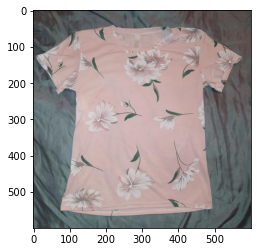

In [43]:
img1 = cv2.cvtColor(cv2.imread(
    '/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16f1fbdf-d339-40f6-aecb-e55199db7a96.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

In [44]:
img1.shape

(600, 600, 3)

In [45]:
#Splitting into channels
r,g,b = cv2.split(img1)

#normalizing 
r,g,b = r/255,g/255,b/255

In [46]:
pca_components = 50
pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

In [47]:
print(reduced_r.shape)
print(reduced_g.shape)
print(reduced_b.shape)

(600, 50)
(600, 50)
(600, 50)


In [48]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9407831664056187
Green Channel: 0.9430935030378399
Red Channel  : 0.9664003014575453


In [49]:
img_reduced = (cv2.merge((reduced_r,reduced_g,reduced_b)))

In [50]:
img1

array([[[ 56,  50,  52],
        [ 58,  52,  54],
        [ 62,  56,  58],
        ...,
        [ 77,  72,  69],
        [ 78,  73,  70],
        [ 79,  74,  71]],

       [[ 56,  50,  52],
        [ 58,  52,  54],
        [ 62,  56,  58],
        ...,
        [ 77,  72,  69],
        [ 77,  72,  69],
        [ 78,  73,  70]],

       [[ 56,  50,  52],
        [ 58,  52,  54],
        [ 61,  55,  57],
        ...,
        [ 76,  71,  68],
        [ 77,  72,  69],
        [ 77,  72,  69]],

       ...,

       [[ 94, 108, 109],
        [ 94, 108, 109],
        [ 94, 108, 109],
        ...,
        [ 67,  86,  82],
        [ 67,  83,  80],
        [ 66,  82,  79]],

       [[ 94, 108, 109],
        [ 94, 108, 109],
        [ 94, 108, 109],
        ...,
        [ 68,  84,  81],
        [ 67,  82,  79],
        [ 66,  81,  78]],

       [[ 95, 109, 110],
        [ 95, 109, 110],
        [ 95, 109, 110],
        ...,
        [ 67,  83,  80],
        [ 66,  81,  78],
        [ 65,  80,  77]]

In [51]:
img_reduced

array([[[ 7.12778488e+00,  5.64490778e+00,  5.52085301e+00],
        [ 3.03154883e-01, -6.43281102e-02, -1.13511974e-01],
        [-2.80998566e-01,  2.25397904e-01,  2.54841361e-01],
        ...,
        [-3.97665646e-02,  1.02976021e-02, -7.05409672e-02],
        [-1.08957487e-01,  3.51816033e-02,  2.31129860e-02],
        [ 2.14677534e-02,  5.11141466e-03, -2.47412678e-02]],

       [[ 7.10310295e+00,  5.62801076e+00,  5.50163069e+00],
        [ 2.90798775e-01, -7.90352808e-02, -1.28501343e-01],
        [-2.85814822e-01,  2.22593144e-01,  2.49141943e-01],
        ...,
        [-4.51126369e-02,  1.15838867e-02, -9.64737634e-02],
        [-9.59830363e-02,  4.16389781e-02,  6.91659738e-02],
        [ 4.82971956e-02, -2.98577357e-02, -1.19481700e-02]],

       [[ 7.09212813e+00,  5.63817849e+00,  5.50004322e+00],
        [ 2.83924945e-01, -9.14785611e-02, -1.39328727e-01],
        [-2.98359480e-01,  2.30093689e-01,  2.52971849e-01],
        ...,
        [-5.55711238e-02,  1.11783898e-02,

In [17]:
import sys

print('size of the image before PCA:',sys.getsizeof(img1))
print()
print('size of the image before PCA:',sys.getsizeof(img_reduced))

size of the image before PCA: 1080136

size of the image before PCA: 720136


using 50 components we can keep around 95% of the variance in the data.

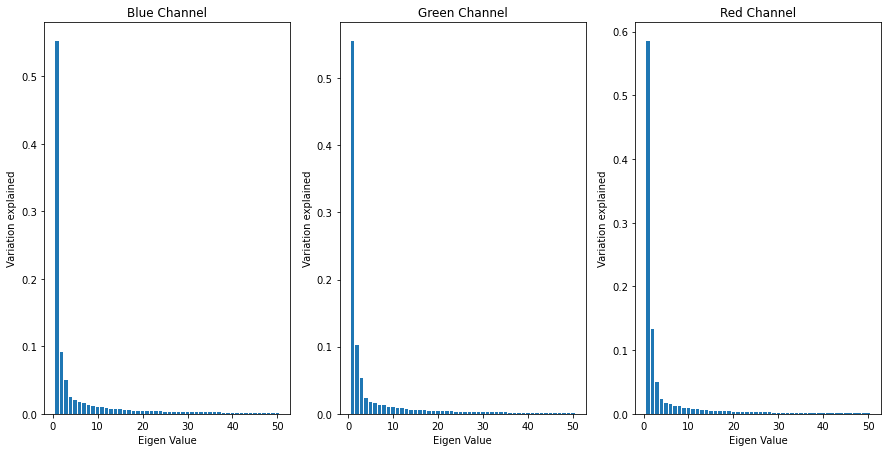

In [18]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

Explained variation per principal component: [0.940784514240588, 0.9430935058214723, 0.9663975864679999]

#### Now reconstructing image to view the visualization of the image

In [53]:
combined = np.array([reduced_r,reduced_g,reduced_b])
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

img_reduced = (cv2.merge((reconstructed_r,reconstructed_g,reconstructed_b)))

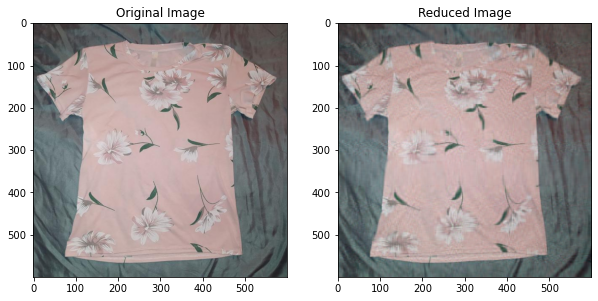

In [20]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img1)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [33]:
def image_PCA(inpath, outpath, n_comp):
    for image_path in os.listdir(inpath):

        # create the full input path and read the file
        input_path = os.path.join(inpath, image_path)
        print(input_path)
        
        image_com = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)

        #split image
        blue_2,green_2,red_2 = cv2.split(image_com)

        #scale channels
        w_blue = blue_2/255
        w_green = green_2/255
        w_red = red_2/255

        #PCA on each channel
        pca_b2 = PCA(n_components=n_comp)
        pca_b2.fit(w_blue)            
        trans_pca_b2 = pca_b2.transform(w_blue)

        pca_g2 = PCA(n_components=n_comp)
        pca_g2.fit(w_green)
        trans_pca_g2 = pca_g2.transform(w_green)

        pca_r2 = PCA(n_components=n_comp)
        pca_r2.fit(w_red)
        trans_pca_r2 = pca_r2.transform(w_red)

        #merge channels after PCA
        b_arr2 = pca_b2.inverse_transform(trans_pca_b2)
        g_arr2 = pca_g2.inverse_transform(trans_pca_g2)
        r_arr2 = pca_r2.inverse_transform(trans_pca_r2)

        img_reduced2 = (cv2.merge((b_arr2, g_arr2, r_arr2)))
        
        print("Merge Successful")

        # create the full output path
        fullpath = os.path.join(outpath, 'PCA_'+image_path)
        cv2.imwrite(fullpath, img_reduced2*255)
        
        print("Successfully saved\n")
        


In [38]:
inpath = '/Users/mahejabeenabdul/Documents/270 project/images_resized_f'
outpath = '/Users/mahejabeenabdul/Documents/270 project/images_com'
n_comp = 50

In [39]:
image_PCA(inpath, outpath,n_comp)

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d7ed1d64-2c65-427f-9ae4-eb4aaa3e2389.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5c1b7a77-1fa3-4af8-9722-cd38e45d89da.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b2e084c7-e3a0-4182-8671-b908544a7cf2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9d053b67-64e1-4050-a509-27332b9eca54.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d885f493-1070-4d51-bd11-f1ec156a2aa7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/87846aa9-86cc-404a-af2c-7e8fe941081d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/22745622-ae32-407f-9af1-9a25eb79d7b3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabd

In [40]:
from sklearn.manifold import TSNE

In [41]:
tsne = TSNE(n_components=2, perplexity=40.0)

In [55]:
tsne_result = tsne.fit_transform(img1)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [38]:
from PIL import Image,ImageStat

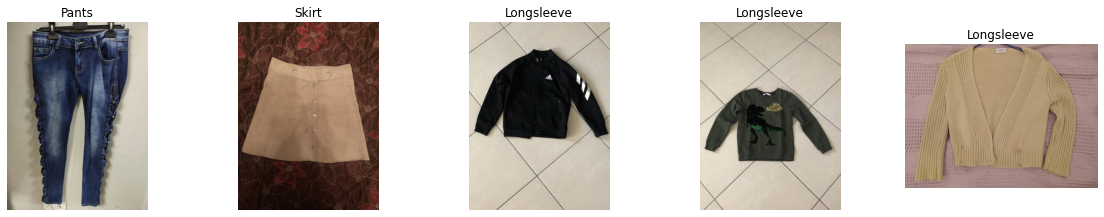

In [59]:
dataset=r"/Users/mahejabeenabdul/Documents/270 project/final dataset"
def show_random_image():
    random_index = random.choice(images.index)
    img_path = images['image'][random_index]
    label = images['label'][random_index]
    complete_path = dataset + '/' + img_path
    image = mpimg.imread(complete_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)
plt.figure(figsize=(20, 20))
for i in range(5):
    ax = plt.subplot(5, 5, i+1)
    show_random_image()

In [77]:
import splitfolders

In [80]:
input_folder = '/Users/mahejabeenabdul/Documents/270 project/chapter 3/final_data'

In [82]:
splitfolders.ratio(input_folder, output="final_data2", 
                   seed=10, ratio=(.7, .15, .15), 
                   group_prefix=None) # default values

Copying files: 11343 files [00:04, 2586.33 files/s]


In [22]:
pip install tensorflow

     |████████████████████████████████| 244.3 MB 11 kB/s s eta 0:00:01�███████████        | 183.5 MB 20.4 MB/s eta 0:00:03
     |████████████████████████████████| 439 kB 35.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 32.5 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 96.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 25.4 MB/s eta 0:00:011
     |████████████████████████████████| 4.5 MB 66.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 114.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 175 kB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 12.2 MB/s eta 0:00:011
     |████████████████████████████████| 3.5 MB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 53

In [2]:
# Importing Pandas to create DataFrame
import pandas as pd

# Creating Empty DataFrame and Storing it in variable df
df = pd.DataFrame()

In [9]:
import os
import PIL
from PIL import Image
from os import listdir

In [14]:
# import the modules
import os
import PIL
from PIL import Image
from os import listdir

lst1=[]
lst2=[]
wid_lst=[]
hgt_lst=[]

# get the path/directory
folder_dir = '/Users/mahejabeenabdul/Documents/270 project/img new folder/images_original'
for images in os.listdir(folder_dir):
    
    if (images.endswith('.jpg')):
        
        img = Image.open(images)

        #fetching the dimensions
        wid, hgt = img.size

        lst1.append(images)
        lst2.append(str(wid) + "x" + str(hgt))
        
        wid_lst.append(wid)
        hgt_lst.append(hgt)

FileNotFoundError: [Errno 2] No such file or directory: 'd7ed1d64-2c65-427f-9ae4-eb4aaa3e2389.jpg'

In [11]:

# import the modules
import os
from os import listdir
 
# get the path or directory
folder_dir = '/Users/mahejabeenabdul/Documents/270 project/img new folder/images_original'
for images in os.listdir(folder_dir):
 
    # check if the image ends with png or jpg or jpeg
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        # display
        print(images)

d7ed1d64-2c65-427f-9ae4-eb4aaa3e2389.jpg
5c1b7a77-1fa3-4af8-9722-cd38e45d89da.jpg
b2e084c7-e3a0-4182-8671-b908544a7cf2.jpg
9d053b67-64e1-4050-a509-27332b9eca54.jpg
d885f493-1070-4d51-bd11-f1ec156a2aa7.jpg
87846aa9-86cc-404a-af2c-7e8fe941081d.jpg
22745622-ae32-407f-9af1-9a25eb79d7b3.jpg
04fa06fb-d71a-4293-9804-fe799375a682.jpg
d9e84490-185d-48f9-ac16-4ef3360616d5.jpg
79e8d176-99e8-4f89-88f5-d26d957405a2.jpg
2125089e-61bc-4ec7-bba5-829e8e2fe268.jpg
654c92f1-8751-411d-80d4-0c8115af28fc.jpg
8f576f1a-839d-4fb2-a224-a4700b2d05da.jpg
e976a8f6-6731-485f-8a9a-2872a5208818.jpg
c6d71611-6bae-4645-8a93-959973e05f8b.jpg
5e944547-5d37-4b1a-a544-64a250377e4d.jpg
95d9e258-ef5b-4cfc-852a-c1f8308cf31f.jpg
177a49f7-8796-45f5-9e3c-e66347db0fe0.jpg
4719349a-06d4-4ddf-8428-69c6cef55e46.jpg
bbf0d9c7-663d-46d1-a9f8-66e8e5678541.jpg
e25a7faa-7a49-4e72-a7ef-e74427f77784.jpg
d995ac1f-fbd0-482c-a308-dafb6a93cfd0.jpg
f8eb9935-30b5-41a8-95dc-5f05dec84dc6.jpg
248aa31e-1a4e-48e3-ac17-8f007a4cf139.jpg
4d42474e-cc0c-45

In [20]:
# import required module
from PIL import Image
  
# get image
filepath = "/Users/mahejabeenabdul/Documents/270 project/img new folder/images_original/00a1b7a8-217d-45bf-93a8-86db0bdf9d9d.jpg"
img = Image.open(filepath)
  
# get width and height
width,height = img.size
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  4032
The width of the image is:  3016
